# Pandemic in Morocco data analysis 
## Introduction
In this notebook, i'm aiming to offer some insights and anlaysis using data offered by the ministry of health to help making some sort of future decisions by the authorities to prevent our people of the worst coming situations.

## Timeline of COVID-19 
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 in Morocco through data analysis and projections. Morocco reacted decisively to the threat of Covid-19 pandemic, declared a state of emergency, and imposed a strict one-month curfew on 20 March and extended it until 20 May 2020 and added 20 day until 10 Juin.

   - **02 March 2020 :** Health ministry confirms first COVID-19 case
   - **10 March 2020 :** Government suspends all travel to Italy
   - **10 March 2020 :** Government confirms first COVID-19 fatality
   - **15 March 2020 :** Government suspends all international travel
   - **15 March 2020 :** Morocco Suspends School Amid Coronavirus Fears
   - **19 March 2020 :** Government declares state of emergency
   - **21 March 2020 :** Intercity transport suspended
   - **07 April 2020 :** Face masks required in the public space
   - **27 April 2020 :** Government introduces Ramadan overnight curfew until May 20
   - **19 May 2020 :** Authorities extend state of emergency and nationwide lockdown to June 10
   - **10 Juin 2020 :** Authorities extend state of emergency to July 10
   - **10 Juin 2020 :** Restrictions to be eased in some provinces from June 11
   - **11 Juin 2020 :** Lockdown End

![title](assets/covid-template.png)
<br>
Source : [Morocco World News](https://www.moroccoworldnews.com/2020/03/296119/morocco-suspends-school-amid-coronavirus-fears/)

## Data exploration
### Load dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date, datetime
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('whitegrid')

### Load dataset

In [2]:
data = pd.read_csv('corona_morocco.csv')
data.head()

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,2/3/2020,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/3/2020,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/3/2020,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/3/2020,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/3/2020,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data shape

In [3]:
print('Data shape :',data.shape)

Data shape : (178, 17)


### Variable types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       178 non-null    object 
 1   Confirmed                  172 non-null    float64
 2   Deaths                     161 non-null    float64
 3   Recovered                  160 non-null    float64
 4   Excluded                   169 non-null    float64
 5   Beni Mellal-Khenifra       158 non-null    float64
 6   Casablanca-Settat          161 non-null    float64
 7   Draa-Tafilalet             158 non-null    float64
 8   Dakhla-Oued Ed-Dahab       158 non-null    float64
 9   Fes-Meknes                 159 non-null    float64
 10  Guelmim-Oued Noun          158 non-null    float64
 11  Laayoune-Sakia El Hamra    158 non-null    float64
 12  Marrakesh-Safi             160 non-null    float64
 13  Oriental                   158 non-null    float64

### Convert Date column into datetime

In [5]:
data["Date"] = pd.to_datetime(data['Date'], dayfirst=True)
data["Date"].dtype

dtype('<M8[ns]')

In [6]:
# selecting rows with history data
data = data[data["Date"] <= pd.Timestamp(date.today())]
data.tail()

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
173,2020-08-22,50812.0,858.0,35040.0,1686164.0,1982.0,14035.0,1809.0,275.0,7790.0,224.0,961.0,8257.0,920.0,4665.0,808.0,9096.0
174,2020-08-23,52349.0,888.0,36343.0,1706521.0,2104.0,14673.0,1884.0,277.0,8019.0,235.0,973.0,8428.0,931.0,4768.0,884.0,9171.0
175,2020-08-24,53252.0,920.0,37478.0,1726728.0,2204.0,14963.0,1917.0,287.0,8158.0,234.0,974.0,8589.0,958.0,4845.0,915.0,9201.0
176,2020-08-25,54528.0,955.0,38293.0,1747642.0,2345.0,15361.0,2029.0,311.0,8300.0,235.0,982.0,8763.0,1004.0,4968.0,944.0,9287.0
177,2020-08-26,55864.0,984.0,40586.0,1768387.0,2453.0,15911.0,2067.0,325.0,8425.0,235.0,995.0,8967.0,1051.0,5084.0,961.0,9386.0


### Reset index

In [7]:
# set Date column as index
data = data.set_index('Date')
data.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
Date,,,,,,,,,,,,,,,,
2020-03-02,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace missing data

In [8]:
# replace NaN values with 0's
data.fillna(method='ffill', inplace=True)
data.fillna(value=0, inplace=True)
data.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
Date,,,,,,,,,,,,,,,,
2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,1.0,0.0,0.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,2.0,0.0,0.0,40.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-06,2.0,0.0,0.0,50.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature engineering

In [9]:
# add actif cases column
actif = data['Confirmed'] - data['Recovered'] - data['Deaths']
data['Actif'] = actif
# add total tested cases column
test_perDay = data['Confirmed'] + data['Excluded']
data['Tested'] = test_perDay

## Data visualization
Repartition of new cases for rows 14 and 15 Avril on regions are not available and that will affect our analysis.

In [10]:
# show dataset from '2020-04-13' to '2020-04-16'
data['2020-04-13':'2020-04-16']

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Tested
Date,,,,,,,,,,,,,,,,,,
2020-04-13,1763.0,126.0,203.0,7365.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1434.0,9128.0
2020-04-14,1888.0,126.0,217.0,8034.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1545.0,9922.0
2020-04-15,2024.0,127.0,229.0,8626.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1668.0,10650.0
2020-04-16,2283.0,130.0,249.0,10388.0,56.0,681.0,80.0,2.0,317.0,1.0,4.0,487.0,140.0,258.0,27.0,230.0,1904.0,12671.0


The optimal solution for the missing values in this example is to drop them out.

In [11]:
my_data_ori = data.copy() # we will need all Confirmed,Death and Recovered collumns later, for all date uncluding 14,15 April

# drop 2020-04-14 & 2020-04-15 rows
data = data[data.index != '2020-04-14']
data = data[data.index != '2020-04-15']

Let's define a function to simply plot covid-19 cases changes over time

In [12]:
def lineplot(data, cols):
    title = "Covid-19 Morocco"
    f, ax = plt.subplots(1,1, figsize=(20, 8))
    for col in cols:
          g = sns.lineplot(x=data.index, y=col, data=data, label=col, linewidth=3)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Total Cases', fontsize=15)
    plt.title(f'Total Cumulative {title}', fontsize=20)
    plt.xticks(rotation=45)
    plt.show();

### Cumulative chart of confirmed, deaths, recovered, & active cases

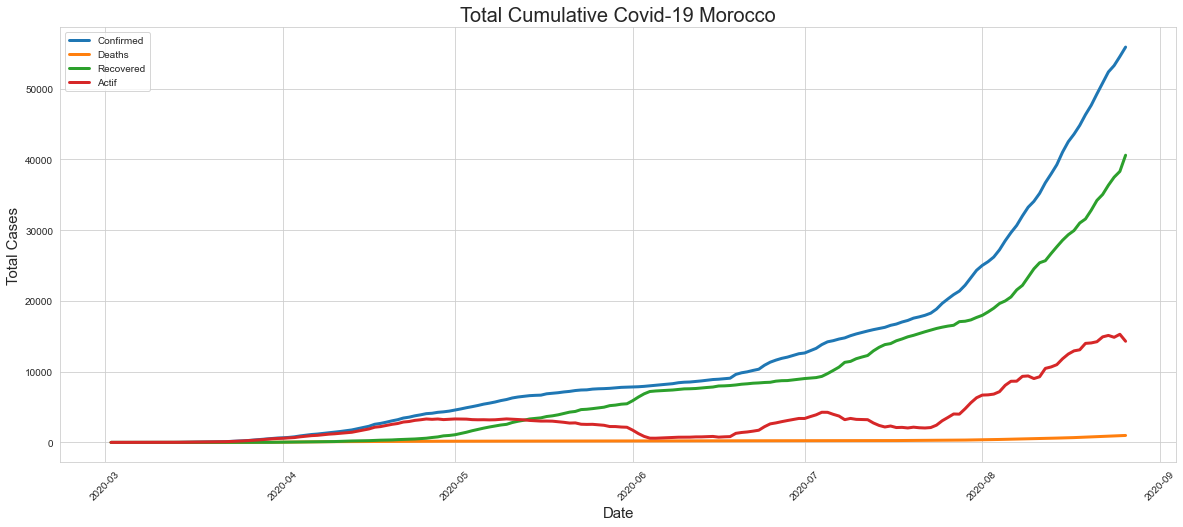

In [13]:
# plot of covid-19 cases 
lineplot(data, ['Confirmed', 'Deaths', 'Recovered','Actif'])

### Total Coronavirus tests (Confirmed & Excluded)

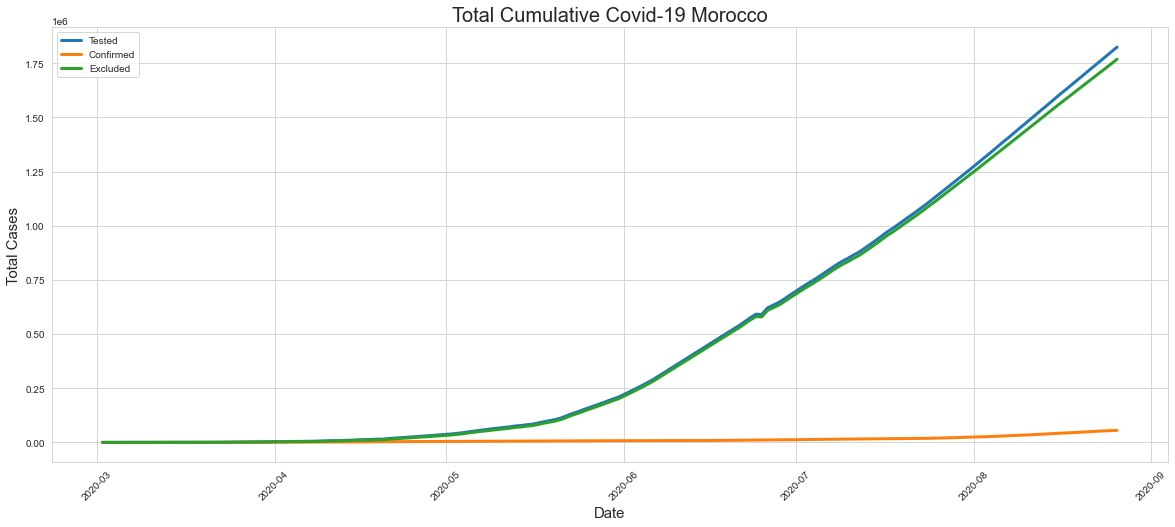

In [14]:
# plot of tested cases (total tested, confirmed & excluded)
lineplot(data, ['Tested', 'Confirmed', 'Excluded'])

### Daily cases, recovered & deaths :
#### Daily cases 

In [15]:
# Adding a new daily cases column to our data
total_cases = data['Confirmed']
new_cases = []

for i in range(len(total_cases)):
    if i == 0:
        new_cases.append(0)
    elif total_cases[i] < total_cases[i-1]:
        new_cases.append(0)
    else:
        temp = int(total_cases[i] - total_cases[i-1])
        new_cases.append(temp)
    
new_cases = np.array(new_cases)
data['New cases'] = new_cases

df_cases = pd.DataFrame(data['New cases'])
df_cases.style.background_gradient(cmap='Reds')

,New cases
Date,
2020-03-02 00:00:00,0
2020-03-03 00:00:00,0
2020-03-04 00:00:00,1
2020-03-05 00:00:00,0
2020-03-06 00:00:00,0
2020-03-07 00:00:00,0
2020-03-08 00:00:00,1
2020-03-09 00:00:00,0
2020-03-10 00:00:00,2


#### Daily deaths 

In [16]:
# Adding a new daily deaths column to our data
total_deaths = data['Deaths']
death = []

for i in range(len(total_deaths)):
    if i == 0:
        death.append(0)
    elif total_deaths[i] < total_deaths[i-1]:
        death.append(0)
    else:
        temp = int(total_deaths[i] - total_deaths[i-1])
        death.append(temp)
    
death = np.array(death)
data['Death'] = death

df_deaths = pd.DataFrame(data['Death'])
df_deaths.style.background_gradient(cmap='Reds')

,Death
Date,
2020-03-02 00:00:00,0
2020-03-03 00:00:00,0
2020-03-04 00:00:00,0
2020-03-05 00:00:00,0
2020-03-06 00:00:00,0
2020-03-07 00:00:00,0
2020-03-08 00:00:00,1
2020-03-09 00:00:00,0
2020-03-10 00:00:00,0


#### Daily recovered

In [17]:
# Adding a new daily recovered column to our data
total_recovered = data['Recovered']
recovered = []

for i in range(len(total_recovered)):
    if i == 0:
        recovered.append(0)
    elif total_recovered[i] < total_recovered[i-1]:
        recovered.append(0)
    else:
        temp = int(total_recovered[i] - total_recovered[i-1])
        recovered.append(temp)
    
recovered = np.array(recovered)
data['Recovered'] = recovered

df_recovered = pd.DataFrame(data['Recovered'])
df_recovered.style.background_gradient(cmap='Greens')

,Recovered
Date,
2020-03-02 00:00:00,0
2020-03-03 00:00:00,0
2020-03-04 00:00:00,0
2020-03-05 00:00:00,0
2020-03-06 00:00:00,0
2020-03-07 00:00:00,0
2020-03-08 00:00:00,0
2020-03-09 00:00:00,0
2020-03-10 00:00:00,0


### Total cases by region 
#### Cumulative chart

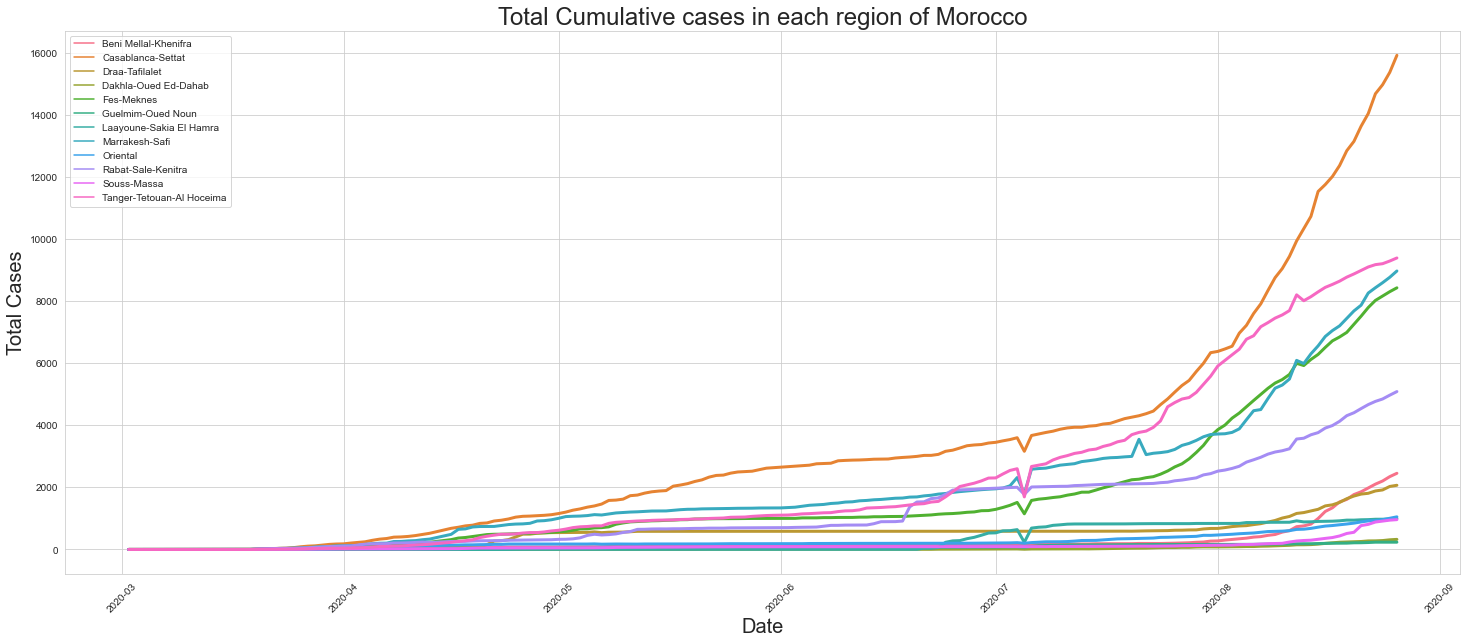

In [18]:
# create a list containing all regions names
REGIONS= ['Beni Mellal-Khenifra', 'Casablanca-Settat', 'Draa-Tafilalet',
          'Dakhla-Oued Ed-Dahab', 'Fes-Meknes', 'Guelmim-Oued Noun',
          'Laayoune-Sakia El Hamra', 'Marrakesh-Safi', 'Oriental',
          'Rabat-Sale-Kenitra', 'Souss-Massa', 'Tanger-Tetouan-Al Hoceima']

# initialize figure
plt.figure(figsize=(25, 10))
# set colors 
custom_palette = sns.color_palette("Paired", 12)
# plot cumulative cases per region
sns.lineplot(data = data[REGIONS], dashes=False, linewidth=3, color=custom_palette)
# set title
plt.title(f'Total Cumulative cases in each region of Morocco', fontsize=24)
# set x_label
plt.xlabel("Date", fontsize=20)
plt.xticks(rotation=45)
# set y_label
plt.ylabel("Total Cases", fontsize=20)
# set legend
plt.legend()
# show figure
plt.show()

#### Sum of total cases per region

In [19]:
# create a list containing names of all Regions 
regions_names = data.columns 
regions = regions_names[4:-4]
print("Regions of Morococo :",list(regions))

Regions of Morococo : ['Beni Mellal-Khenifra', 'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab', 'Fes-Meknes', 'Guelmim-Oued Noun', 'Laayoune-Sakia El Hamra', 'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa', 'Tanger-Tetouan-Al Hoceima']


In [20]:
# create a dataframe to sum all the cases per region 
cases_per_region = data[regions].iloc[[-1]].transpose()
cases_per_region.columns = ['Confirmed']
cases_per_region

,Confirmed
Beni Mellal-Khenifra,2453.0
Casablanca-Settat,15911.0
Draa-Tafilalet,2067.0
Dakhla-Oued Ed-Dahab,325.0
Fes-Meknes,8425.0
Guelmim-Oued Noun,235.0
Laayoune-Sakia El Hamra,995.0
Marrakesh-Safi,8967.0
Oriental,1051.0
Rabat-Sale-Kenitra,5084.0


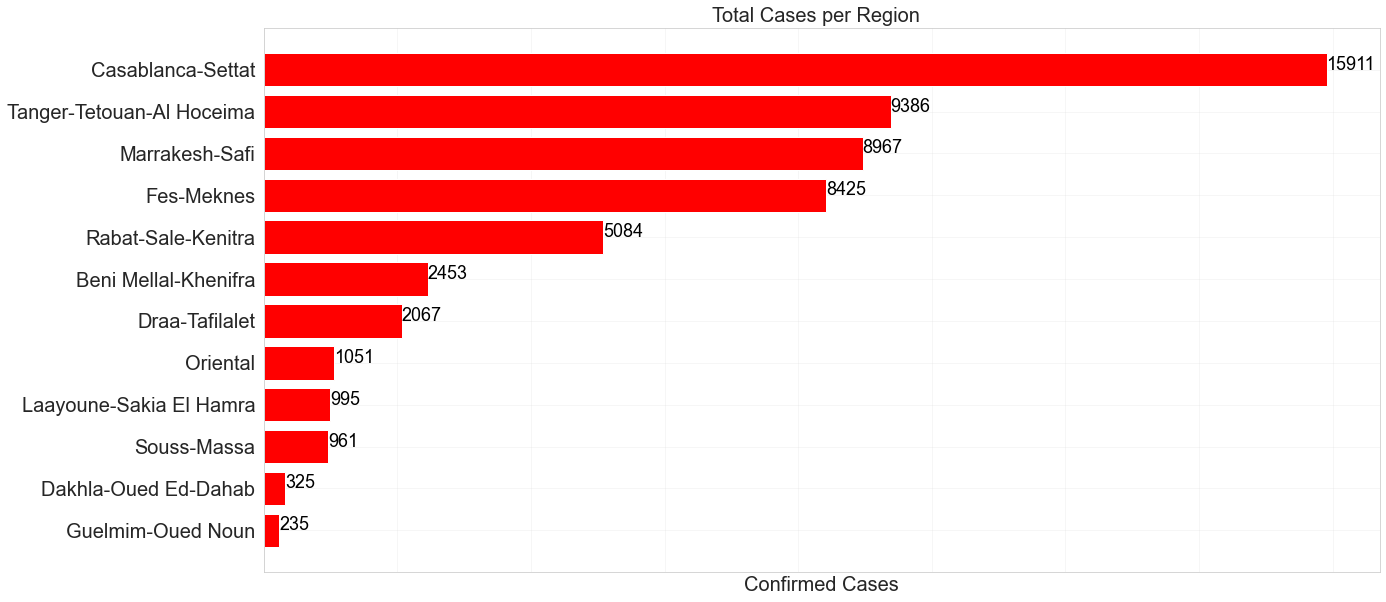

In [21]:
# sort total cases per region 
sorted_cases = cases_per_region.sort_values(by='Confirmed', ascending=True)
# reshape values 
values = sorted_cases.values.reshape(12,)

# initialize figure
plt.figure(figsize=(20,10))
plt.grid(alpha=0.2)
#plt.axes(axisbelow=True)
# plot bars for each region
plt.barh(sorted_cases.index,values,color="red")
# set title
plt.title("Total Cases per Region  ",fontsize=20)
# set x_label 
plt.xlabel("Confirmed Cases",fontsize=20)
plt.tick_params(size=5,labelsize = 20)
plt.xticks(visible=False)

# plot total cases values beside bars
for index, value in enumerate(values):
    plt.text(value, index, str(int(value)),fontsize=18,color='black')

### Distribution of total cases per region

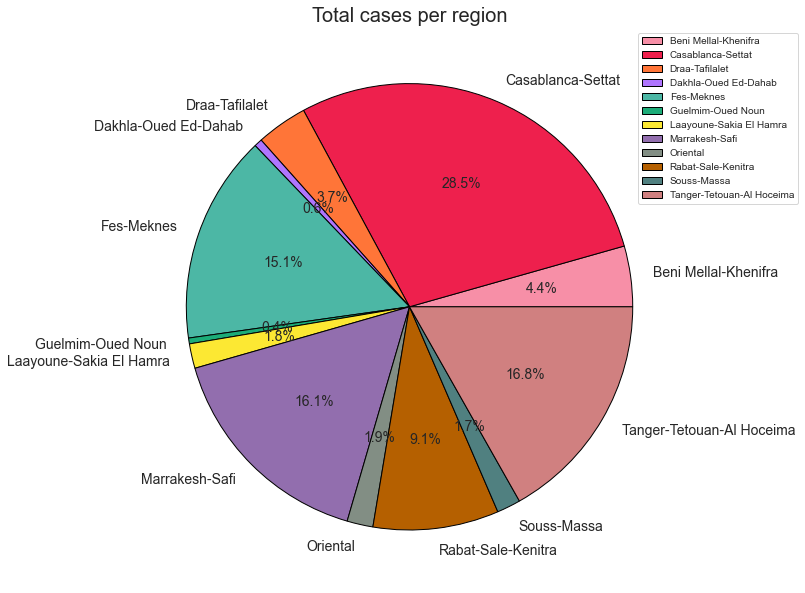

In [22]:
# initialize pie chart figure of total cases by region
plt.figure(figsize=(10,12))

# define slices
slices=list(cases_per_region['Confirmed'])
# define labels 
Labels =list(cases_per_region.index)
# define list of colors for each region (it will be usefull to plot each region with specific color)
Colors = ['#f78fA7','#EE204D','#FF7538',
          '#aF75FE','#4CB7A5','#1CAC78',
          '#FCE833', '#926EAE', '#828E84',
          '#B56000', '#508080','#D08080']

# plot pie chart
plt.pie(slices, 
        labels = Labels, 
        colors = Colors, 
        shadow = False, 
        autopct='%1.1f%%', 
        wedgeprops = {'edgecolor':'black'}, 
        textprops={'fontsize': 14})

# set legend
plt.legend(Labels, loc='best', bbox_to_anchor=(0.9, 1))
# set title
plt.title('Total cases per region', fontsize= 20)
# show figure
plt.show()

### Evolution of Coronavirus for each region

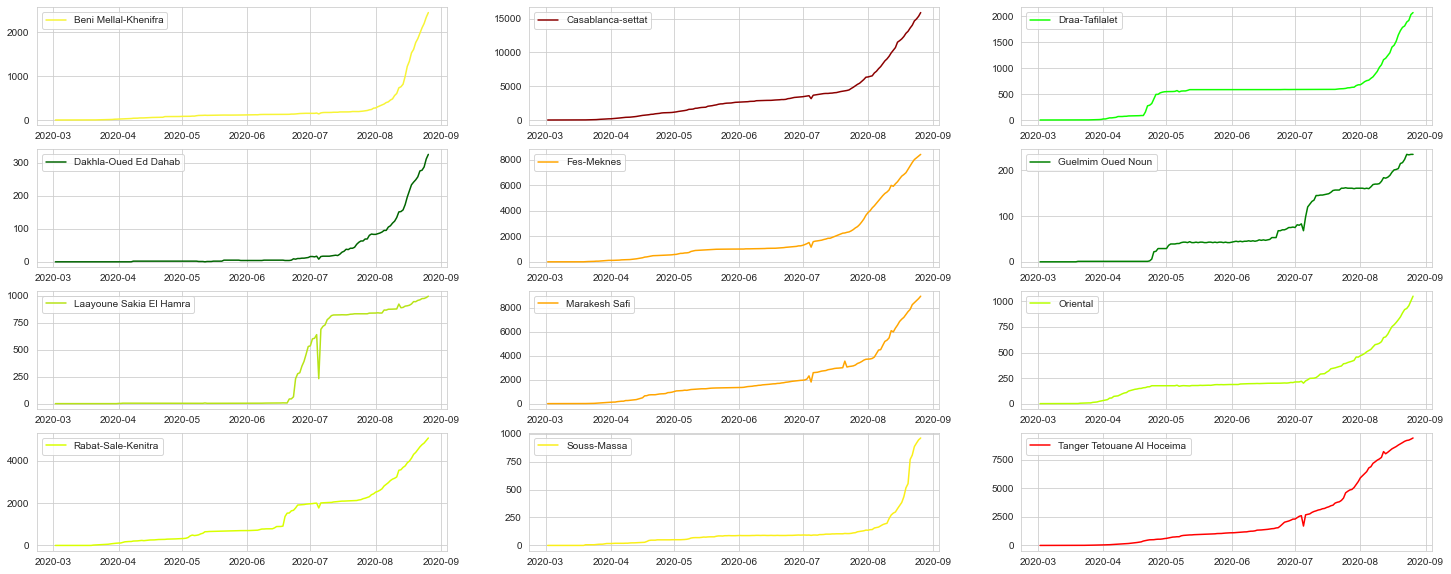

In [23]:
plt.figure(figsize=(25,10))

BM = data['Beni Mellal-Khenifra']
CS = data['Casablanca-Settat']
DT = data['Draa-Tafilalet']
DO = data['Dakhla-Oued Ed-Dahab']
FM = data['Fes-Meknes']
GO = data['Guelmim-Oued Noun']
LS = data['Laayoune-Sakia El Hamra']
MS = data['Marrakesh-Safi']
Or = data['Oriental']
RS = data['Rabat-Sale-Kenitra']
SM = data['Souss-Massa']
TT = data['Tanger-Tetouan-Al Hoceima']

ax1 = plt.subplot(4, 3, 1)
sns.lineplot(data = BM,label='Beni Mellal-Khenifra', color='#f7f436')
ax2 = plt.subplot(4, 3, 2)
sns.lineplot(data = CS,label='Casablanca-settat', color='darkred')
ax3 = plt.subplot(4, 3, 3)
sns.lineplot(data = DT,label='Draa-Tafilalet', color='#11ff00')
ax4 = plt.subplot(4, 3, 4)
sns.lineplot(data = DO,label='Dakhla-Oued Ed Dahab', color='darkgreen')
ax5 = plt.subplot(4, 3, 5)
sns.lineplot(data = FM,label='Fes-Meknes', color='orange')
ax6 = plt.subplot(4, 3, 6)
sns.lineplot(data = GO,label='Guelmim Oued Noun', color='green')
ax7 = plt.subplot(4, 3, 7)
sns.lineplot(data = LS,label='Laayoune Sakia El Hamra', color='#b7e317')
ax8 = plt.subplot(4, 3, 8)
sns.lineplot(data = MS,label='Marakesh Safi', color='orange')
ax9 = plt.subplot(4, 3, 9)
sns.lineplot(data = Or,label='Oriental', color='#b7ff00')
ax10 = plt.subplot(4, 3, 10)
sns.lineplot(data = RS,label='Rabat-Sale-Kenitra', color='#d9ff00')
ax11 = plt.subplot(4, 3, 11)
sns.lineplot(data = SM,label='Souss-Massa', color='#faef19')
ax12 = plt.subplot(4, 3, 12)
sns.lineplot(data = TT,label='Tanger Tetouane Al Hoceima', color='red')

plt.show()

### Global percentage of each case 

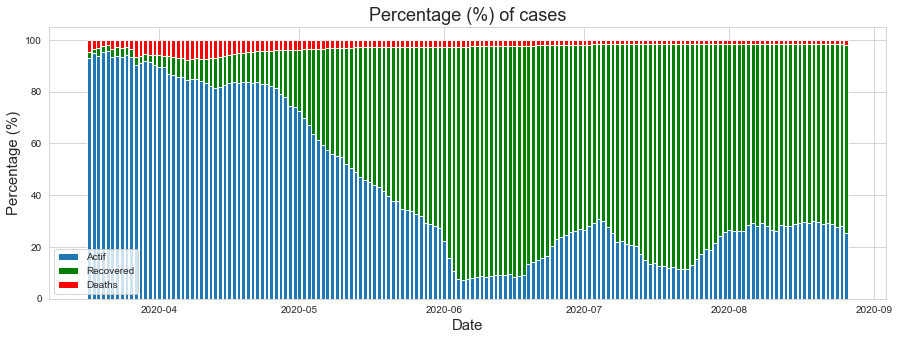

In [24]:
# initialize figure
plt.figure(figsize=(15,5))

# getting the data that we want to plot
data_actif =(my_data_ori['Actif']*100/my_data_ori['Confirmed'])[15:]
data_recovered =(my_data_ori['Recovered']*100/my_data_ori['Confirmed'])[15:]
data_deaths =(my_data_ori['Deaths']*100/my_data_ori['Confirmed'])[15:]

# actif cases percentage
p1 = plt.bar(data_actif.index, data_actif, label='Actif')
# recovered cases percentage
p2 = plt.bar(data_recovered.index, data_recovered, bottom=data_actif, color='g', label='Recovered')
# deaths cases percentage
p3 = plt.bar(data_deaths.index, data_deaths, bottom=data_actif+data_recovered, color='r', label='Deaths')

# set x_label
plt.xlabel('Date', fontsize=15)
# set y_label
plt.ylabel('Percentage (%)', fontsize=15)
# set title
plt.title('Percentage (%) of cases', fontsize=18)
# set legend
plt.legend()
# show figure
plt.show()

## Conclusion
Casablanca-Settat,Tanger-Tetouan Al Hoceima and Marrakesh-Safi have the greatest values of the total cases, because of the comercial,industrial and familial epicenter, especially for Casablanca and Tanger that represent the largest industrial zones in Morocco.